In [1]:
!pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 12.4 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install pm4py

ERROR: Exception:
Traceback (most recent call last):
  File "/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 437, in _error_catcher
    yield
  File "/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/http/client.py", line 465, in read

In [20]:
import pandas as pd

In [21]:
from datetime import datetime

with open("data/log.txt", "r") as file:
    with open("data/logs.csv", "w") as output:
        output.write("datetime,module,log_level,log_data\n")
        for l in file.readlines():
            foo = l.split("-")
            
            year, month, day, module, level, data = foo
            day, time = day.split(" ")[:-1]
            hour, minutes, seconds = map(int, time.split(":"))
            date_time = datetime(int(year), int(month), int(day), hour, minutes, seconds)
            if len(data.split(',')) < 5: 
                continue
            
            action,user_id,  _type = data.split(',')[0], data.split(",")[1], data.split(',')[-1]
            
            output.write(f"{date_time},{module},{level},{action +'_' + _type}\n")


In [22]:
df = pd.read_csv("data/logs.csv")
df

,datetime,module,log_level,log_data
0,2023-10-06 16:44:31,__main__,INFO,menu_buttons_transition
1,2023-10-06 16:44:33,__main__,INFO,menu_task_transition
2,2023-10-06 16:44:34,__main__,INFO,menu_task_id_task_found
3,2023-10-06 16:44:34,__main__,INFO,menu_task_problems_problems_found
4,2023-10-06 16:44:39,__main__,INFO,menu_task_problem_correct_answer
5,2023-10-06 16:44:40,__main__,INFO,menu_task_problem_task_transition
6,2023-10-06 16:44:53,__main__,INFO,menu_task_id_task_found
7,2023-10-06 16:44:53,__main__,INFO,menu_task_problems_problems_found
8,2023-10-06 16:45:31,__main__,INFO,menu_task_problem_correct_answer
9,2023-10-06 16:45:41,__main__,INFO,menu_task_problem_incorrect_answer


str

In [31]:
def process_data(df: pd.DataFrame) -> pd.DataFrame:
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.sort_values("datetime")
    df["case_id"] = [1 for _ in range(len(df))]
    df = df.drop(["log_level", "module"], axis=1)
    return df

In [32]:
df = process_data(df)
df.head(4)

,datetime,log_data,case_id
0,2023-10-06 16:44:31,menu_buttons_transition,1
1,2023-10-06 16:44:33,menu_task_transition,1
2,2023-10-06 16:44:34,menu_task_id_task_found,1
3,2023-10-06 16:44:34,menu_task_problems_problems_found,1


/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/egortarasov/uni/5 семестр/Дискретка/vk/venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)


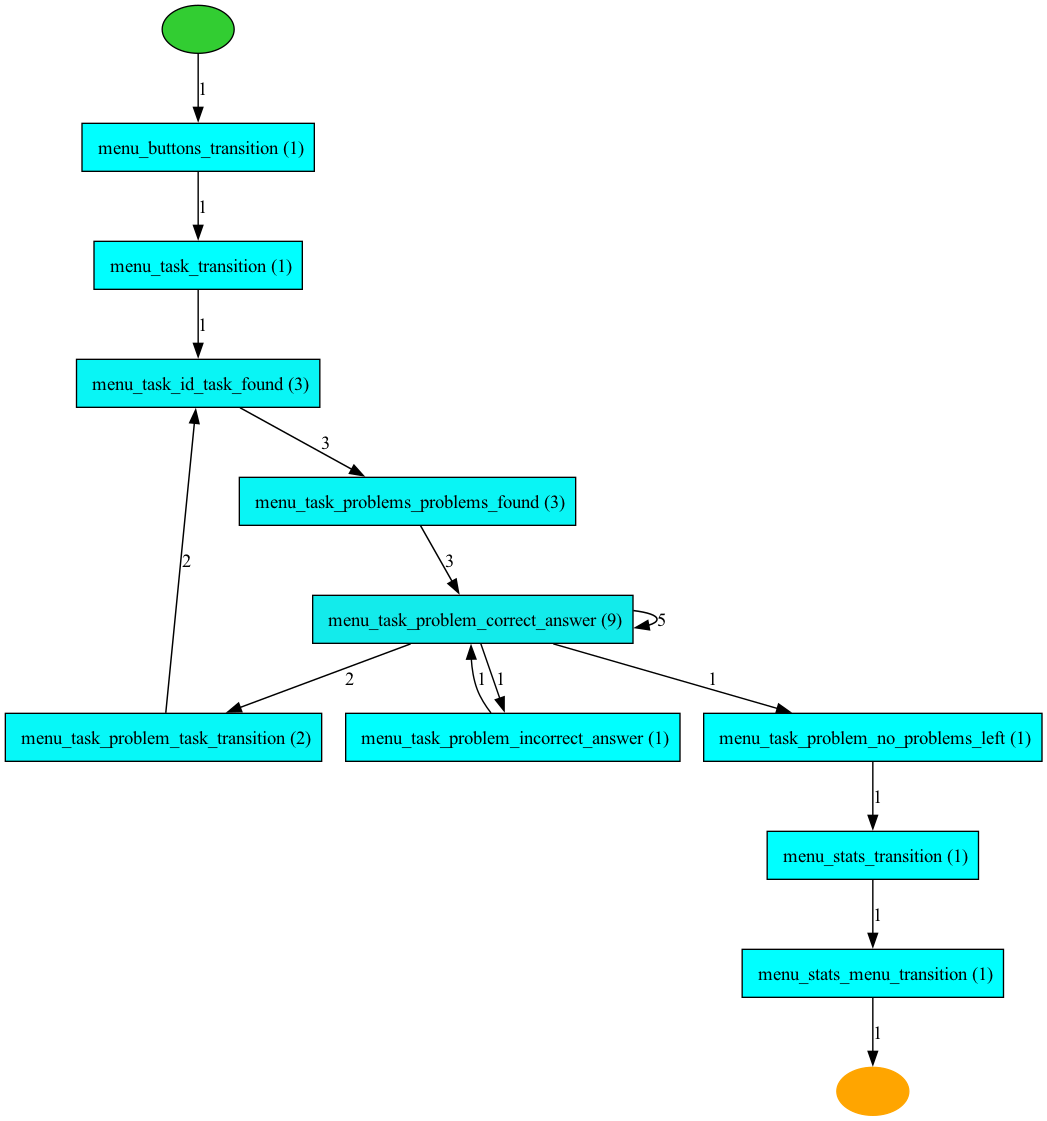

In [34]:
import pm4py

def show(df: pd.DataFrame):
  df = pm4py.format_dataframe(df, case_id = 'case_id', activity_key = 'log_data', timestamp_key = 'datetime')
  heu_net = pm4py.discover_heuristics_net(df)
  pm4py.view_heuristics_net(heu_net)

show(df)